## Computational Physics Homework Sheet - 3
-Aleena Sibi, Kriti Baweja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
from tqdm import tqdm
import math 


## Theoretical Questions

<b>Que-1)</b> Use the expression above and the fact that the mean magnetization (per site) and energy (per site) are given by to derive corresponding expressions for $O[\phi]$ for these quantities<br>

$$ \langle O\rangle = \frac{1}{Z}\int \frac{d\phi}{2\pi\beta\hat{J}}O[\phi]e^{-S[\phi]}$$
Given,
$$Z[J>0] = \int_{-\infty}^\infty \frac{d\phi}{\sqrt{2\pi\beta|\beta\hat{J}|}} e^{\frac{-\phi^2}{2\beta\hat{J}} + Nlog(2 cosh(\beta h \pm \phi))}$$

$$ \langle m\rangle =  \frac{1}{N\beta}\frac{\partial}{\partial h}log(Z) = \frac{1}{N\beta}\frac{1}{Z}\frac{\partial Z}{\partial h}$$
$$\frac{\partial Z}{\partial h} = \int \frac{d\phi}{\sqrt{2\pi\beta|\beta\hat{J}|}} e^{\frac{-\phi^2}{2\beta\hat{J}} + Nlog(2 cosh(\beta h \pm \phi))} \times N\beta \frac{2 sinh(\beta h \pm \phi)}{2 cosh(\beta h \pm \phi)} =  N\beta \int \frac{d\phi}{\sqrt{2\pi\beta|\beta\hat{J}|}} e^{\frac{-\phi^2}{2\beta\hat{J}} + Nlog(2 cosh(\beta h \pm \phi))}  tanh(\beta h \pm \phi)$$
Substituting this in $\langle m \rangle$
$$\langle m \rangle = \frac{1}{Z}\int \frac{d\phi}{2\pi\beta\hat{J}}   \hspace{1mm}tanh(\beta h \pm \phi) e^{-S[\phi]}$$
$$\therefore O[\phi] = tanh(\beta h \pm \phi)$$

For energy,
$$\langle \epsilon \rangle = -\frac{1}{N}\frac{\partial}{\partial\beta}log (Z)  = -\frac{1}{NZ}\frac{\partial Z}{\partial\beta}$$

$$\frac{\partial Z}{\partial\beta}  = \int_{-\infty}^\infty \frac{d\phi}{\sqrt{2\pi\beta|\hat{J}|}} e^{\frac{-\phi^2}{2\beta\hat{J}} + Nlog(2 cosh(\beta h \pm \phi))}\left[-\frac{1}{2\beta} + \frac{\phi^2}{2J\beta^2} + Nhtanh(\beta h \pm \phi)\right]$$

$$\langle \epsilon \rangle = -\frac{1}{N}\frac{\partial}{\partial\beta}log (Z)  = -\frac{1}{NZ}\int_{-\infty}^\infty \frac{d\phi}{\sqrt{2\pi\beta|\hat{J}|}} e^{-S[\phi]}\left[-\frac{1}{2\beta} + \frac{\phi^2}{2\hat{J}\beta^2} + Nh\tanh(\beta h \pm \phi)\right]$$
$$\therefore O[\phi] = \left[\frac{1}{2N\beta} - \frac{\phi^2}{2N\hat{J}\beta^2} - h\tanh(\beta h \pm \phi)\right]$$




<b>Que-2)</b> Determine the equations of motion (EoMs) for this Hamiltonian by applying the Hamilton equations.
$$\dot{\phi} =\frac{\partial H}{\partial p} =  p $$
$$\dot{p} = -\frac{\partial H}{\partial \phi}  = -\frac{\phi}{\beta\hat{J}} + Ntanh(\beta h + \phi)$$

In [2]:
N=5
T=0.5
h=1.
j=1/N


In [3]:
def H(p,phi):
    return 0.5*p**2 + (0.5*T*phi**2)/j -(N)*np.log(2*np.cosh(h/T+phi))
def phidot(p):
    return (p)
def pdot(phi):
    return(-phi*T/j + N*np.tanh(h/T+phi))

In [4]:
def leapfrog(p,phi,n):
    epsilon=1/n ## if the length if trajectory is 1: $p^2+ phi^2=1$
    P,Phi=p,phi
    P=p+epsilon*0.5*pdot(phi)
    for i in range(n):
        Phi= Phi + epsilon*phidot(P)
        P=P+epsilon*pdot(Phi)
        
    P=P-0.5*epsilon*pdot(Phi)
    return P,Phi
    
    

In [5]:
def deltaH (p,phi,P,Phi):
    Prob=min([1,np.exp(H(p,phi)-H(P,Phi))])
    #print(np.exp(H(p,phi)-H(P,Phi)))
    if(Prob<1):
        #print(Prob)
        a=np.random.uniform(0,1)
        if(a<Prob):
            Prob=1
        
    if(Prob==1):
        return Prob,P,Phi
    else:
        return Prob,p,phi
        

In [6]:
## Bootstrap error
def bootstrap(marr):
    means = []
    for j in range(8):
        Marr = []
        for i in range(10):  
            Marr.append(np.random.choice(marr))
        means.append(np.mean(Marr))

    Me = np.mean(means)
    var = 0 
    for i in range(8):
        var += (means[i] - Me)**2

    std = np.sqrt(var/8)
    return std

In [7]:
po=1.
phio=-2
DH=[]
Nar=[i for i in range(3,100)]
for i in range(3,100):
    Pf,Phif=leapfrog(po,phio,i)
    DH.append(abs((H(Pf,Phif)-H(po,phio))/H(po,phio)))

Text(0, 0.5, 'convergence of algorithm')

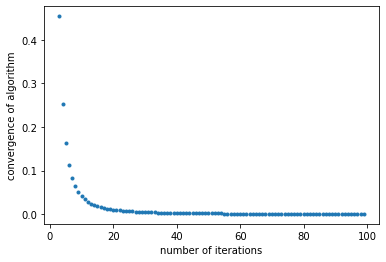

In [8]:
plt.plot(Nar,DH,'.')
plt.xlabel("number of iterations")
plt.ylabel("convergence of algorithm")

The trend matches the trend shown in Figure 1 given in the exercise sheet 3.

## HMC

In [26]:
phyarr=[]
for i in range(5000):
    p=np.random.normal(0,1)
    phi=1
    pf,phif=leapfrog(p,phi,100) ## leapfrog convergence is good enough for n=100
    prob,P_f,Phi_f=deltaH(p,phi,pf,phif)
    p,phi=P_f,Phi_f
    if(i>500):
        phyarr.append(phi)
    


Text(0, 0.5, 'P($\\phi$)')

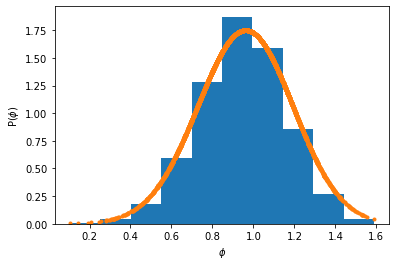

In [27]:
plt.hist(phyarr,bins=10,density=1)
N=20
T=1
h = 1
j=1/N
phyarr = np.array(phyarr)
p = np.linspace(0,2)
Pth = np.exp(-T*phyarr**2/(2*1*j))*np.exp(N*np.log(2*np.cosh(h/T + phyarr)))
Pth = 1.75*Pth/max(Pth)
plt.plot(phyarr,Pth,'.')
plt.xlabel('$\phi$')
plt.ylabel('P($\phi$)')

In [11]:
h=0.5
T=1.
J=np.linspace(0.2,2,15)
N=5
earr=[]
marr=[]


for k in tqdm(range(len(J))):
    count = 0
    mavg=0
    eavg=0
    j=J[k]/N
    phyarr=[]
    for i in range(5000):
        p=np.random.normal(0,1)
        phi=1
        pf,phif=leapfrog(p,phi,100) ## leapfrog convergence is good enough for n=50
        prob,P_f,Phi_f=deltaH(p,phi,pf,phif)
        if(prob==1):
            count += 1
            
        p,phi=P_f,Phi_f
        if(i>500):
            phyarr.append(phi)
            mavg+=np.tanh(h/T+phyarr[i-501])
            eavg+=(0.5*T/N-0.5*phyarr[i-501]**2*T**2/(N*j)-h*np.tanh(h/T+phyarr[i-501]))
        #print(mavg)
    #print(count/5000)
    mavg=mavg/len(phyarr)
    eavg=eavg/len(phyarr)
    earr.append(eavg)
    marr.append(mavg)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:27<00:00,  1.86s/it]


In [12]:
def f (j,x):
    return(np.exp(0.5*j*x**2/T + h*x/T))

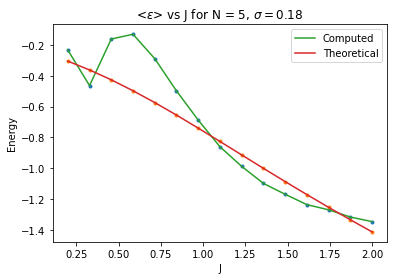

In [13]:
Z=np.zeros(len(J))
E=np.zeros(len(J))

for i in range(N+1):
    Z+=math.comb(N,i)*f(J/N,N-2*i)

for i in range(N + 1):
        E+= -(math.comb(N,i)*((0.5*(J/N)*(N - 2*i)**2)/T + h*(N - 2*i)/T)*f(J/(N*T),N-2*i))/(Z*N)
        
        
std = bootstrap(earr)
plt.title('<$\epsilon$> vs J for N = 5, $\sigma = %s$'%np.round(std,2))
plt.plot(J,earr,".",)
plt.plot(J,E,'.')
plt.plot(J,earr,label = 'Computed')
plt.plot(J,E,label = 'Theoretical')
plt.xlabel("J")
plt.ylabel("Energy")
plt.legend()

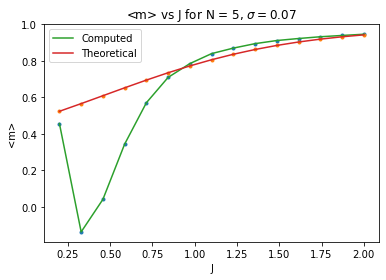

In [14]:
M = np.zeros(len(J))

for i in range(N + 1):
        M+= (math.comb(N,i)*((N - 2*i)*f(J/(N*T),N-2*i))/(Z*N))
        
std = bootstrap(marr)
plt.title('<m> vs J for N = 5, $\sigma = %s$'%np.round(std,2))        
plt.plot(J,marr,'.')
plt.plot(J,M,'.')
plt.plot(J,marr,label = 'Computed')
plt.plot(J,M,label = 'Theoretical')
plt.xlabel("J")
plt.ylabel("<m>")
plt.legend()

## Plots of $<m>$ vs J
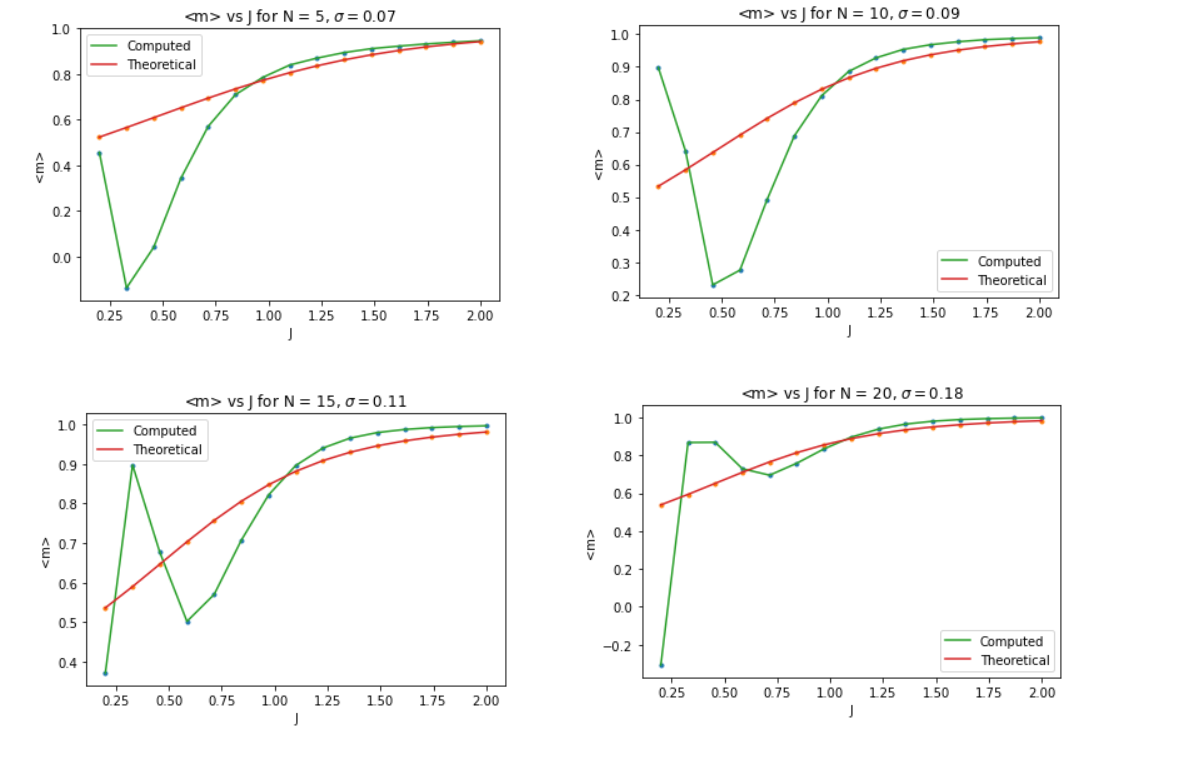

## Plots of $<\epsilon>$ vs J
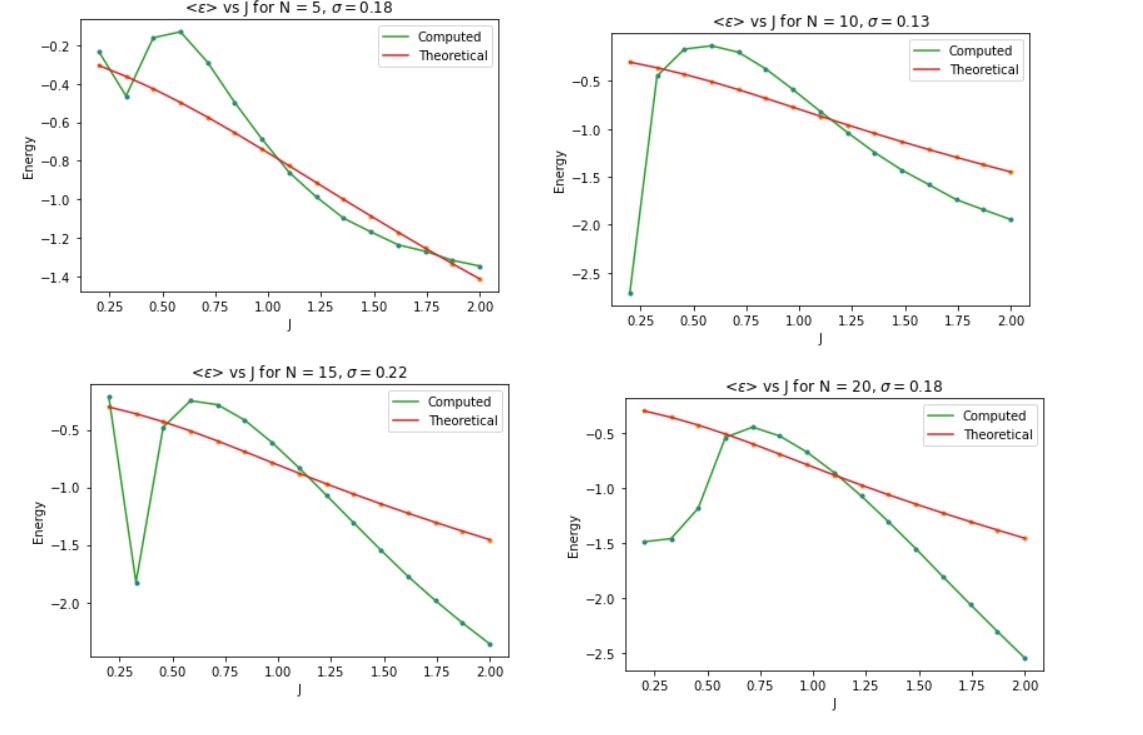

### All the plots that we have obtained for different N's have been obtained from the code written below. We have used the same variables throughout so run the whole code in order. 

In [15]:
h=0.5
T=1.
J=np.linspace(0.2,2,15)
N=10
earr=[]
marr=[]


for k in tqdm(range(len(J))):
    count = 0
    mavg=0
    eavg=0
    j=J[k]/N
    phyarr=[]
    for i in range(5000):
        p=np.random.normal(0,1)
        phi=1
        pf,phif=leapfrog(p,phi,100) ## leapfrog convergence is good enough for n=50
        prob,P_f,Phi_f=deltaH(p,phi,pf,phif)
        if(prob==1):
            count += 1
            
        p,phi=P_f,Phi_f
        if(i>500):
            phyarr.append(phi)
            mavg+=np.tanh(h/T+phyarr[i-501])
            eavg+=(0.5*T/N-0.5*phyarr[i-501]**2*T**2/(N*j)-h*np.tanh(h/T+phyarr[i-501]))
        #print(mavg)
    #print(count/5000)
    mavg=mavg/len(phyarr)
    eavg=eavg/len(phyarr)
    earr.append(eavg)
    marr.append(mavg)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:28<00:00,  1.87s/it]


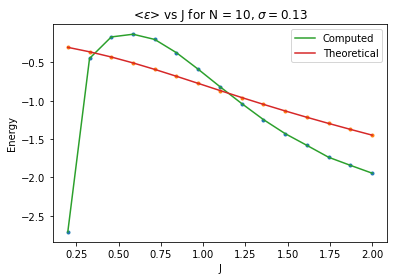

In [16]:
Z=np.zeros(len(J))
E=np.zeros(len(J))

for i in range(N+1):
    Z+=math.comb(N,i)*f(J/N,N-2*i)

for i in range(N + 1):
        E+= -(math.comb(N,i)*((0.5*(J/N)*(N - 2*i)**2)/T + h*(N - 2*i)/T)*f(J/(N*T),N-2*i))/(Z*N)
        
        
std = bootstrap(earr)
plt.title('<$\epsilon$> vs J for N = 10, $\sigma = %s$'%np.round(std,2))   
plt.plot(J,earr,".",)
plt.plot(J,E,'.')
plt.plot(J,earr,label = 'Computed')
plt.plot(J,E,label = 'Theoretical')
plt.xlabel("J")
plt.ylabel("Energy")
plt.legend()

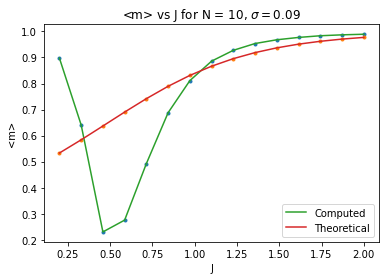

In [17]:
M = np.zeros(len(J))

for i in range(N + 1):
        M+= (math.comb(N,i)*((N - 2*i)*f(J/(N*T),N-2*i))/(Z*N))
        

std = bootstrap(marr)
plt.title('<m> vs J for N = 10, $\sigma = %s$'%np.round(std,2))
plt.plot(J,marr,'.')
plt.plot(J,M,'.')
plt.plot(J,marr,label = 'Computed')
plt.plot(J,M,label = 'Theoretical')
plt.xlabel("J")
plt.ylabel("<m>")
plt.legend()

In [18]:
h=0.5
T=1.
J=np.linspace(0.2,2,15)
N=15
earr=[]
marr=[]


for k in tqdm(range(len(J))):
    count = 0
    mavg=0
    eavg=0
    j=J[k]/N
    phyarr=[]
    for i in range(5000):
        p=np.random.normal(0,1)
        phi=1
        pf,phif=leapfrog(p,phi,100) ## leapfrog convergence is good enough for n=50
        prob,P_f,Phi_f=deltaH(p,phi,pf,phif)
        if(prob==1):
            count += 1
            
        p,phi=P_f,Phi_f
        if(i>500):
            phyarr.append(phi)
            mavg+=np.tanh(h/T+phyarr[i-501])
            eavg+=(0.5*T/N-0.5*phyarr[i-501]**2*T**2/(N*j)-h*np.tanh(h/T+phyarr[i-501]))
        #print(mavg)
    #print(count/5000)
    mavg=mavg/len(phyarr)
    eavg=eavg/len(phyarr)
    earr.append(eavg)
    marr.append(mavg)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:27<00:00,  1.81s/it]


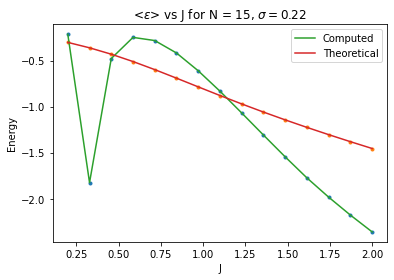

In [19]:
Z=np.zeros(len(J))
E=np.zeros(len(J))

for i in range(N+1):
    Z+=math.comb(N,i)*f(J/N,N-2*i)

for i in range(N + 1):
        E+= -(math.comb(N,i)*((0.5*(J/N)*(N - 2*i)**2)/T + h*(N - 2*i)/T)*f(J/(N*T),N-2*i))/(Z*N)
        
        
std = bootstrap(earr)
plt.title('<$\epsilon$> vs J for N = 15, $\sigma = %s$'%np.round(std,2))    
plt.plot(J,earr,".",)
plt.plot(J,E,'.')
plt.plot(J,earr,label = 'Computed')
plt.plot(J,E,label = 'Theoretical')
plt.xlabel("J")
plt.ylabel("Energy")
plt.legend()

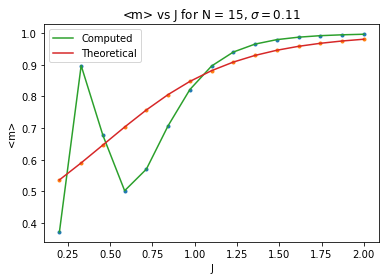

In [20]:
M = np.zeros(len(J))

for i in range(N + 1):
        M+= (math.comb(N,i)*((N - 2*i)*f(J/(N*T),N-2*i))/(Z*N))
        

std = bootstrap(marr)
plt.title('<m> vs J for N = 15, $\sigma = %s$'%np.round(std,2))
plt.plot(J,marr,'.')
plt.plot(J,M,'.')
plt.plot(J,marr,label = 'Computed')
plt.plot(J,M,label = 'Theoretical')
plt.xlabel("J")
plt.ylabel("<m>")
plt.legend()

In [21]:
h=0.5
T=1.
J=np.linspace(0.2,2,15)
N=20
earr=[]
marr=[]


for k in tqdm(range(len(J))):
    count = 0
    mavg=0
    eavg=0
    j=J[k]/N
    phyarr=[]
    for i in range(5000):
        p=np.random.normal(0,1)
        phi=1
        pf,phif=leapfrog(p,phi,100) ## leapfrog convergence is good enough for n=50
        prob,P_f,Phi_f=deltaH(p,phi,pf,phif)
        if(prob==1):
            count += 1
            
        p,phi=P_f,Phi_f
        if(i>500):
            phyarr.append(phi)
            mavg+=np.tanh(h/T+phyarr[i-501])
            eavg+=(0.5*T/N-0.5*phyarr[i-501]**2*T**2/(N*j)-h*np.tanh(h/T+phyarr[i-501]))
        #print(mavg)
    #print(count/5000)
    mavg=mavg/len(phyarr)
    eavg=eavg/len(phyarr)
    earr.append(eavg)
    marr.append(mavg)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:27<00:00,  1.82s/it]


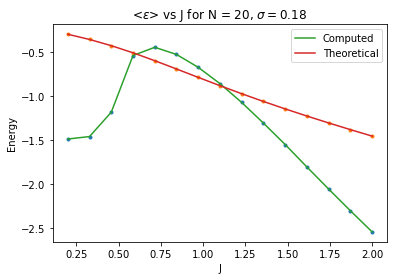

In [22]:
Z=np.zeros(len(J))
E=np.zeros(len(J))

for i in range(N+1):
    Z+=math.comb(N,i)*f(J/N,N-2*i)

for i in range(N + 1):
        E+= -(math.comb(N,i)*((0.5*(J/N)*(N - 2*i)**2)/T + h*(N - 2*i)/T)*f(J/(N*T),N-2*i))/(Z*N)
        
        
std = bootstrap(earr)
plt.title('<$\epsilon$> vs J for N = 20, $\sigma = %s$'%np.round(std,2))   
plt.plot(J,earr,".",)
plt.plot(J,E,'.')
plt.plot(J,earr,label = 'Computed')
plt.plot(J,E,label = 'Theoretical')
plt.xlabel("J")
plt.ylabel("Energy")
plt.legend()

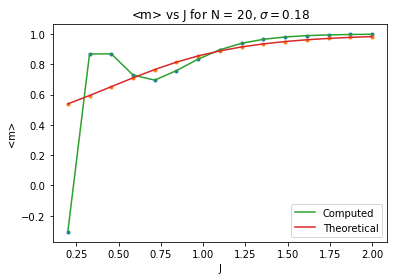

In [23]:
M = np.zeros(len(J))

for i in range(N + 1):
        M+= (math.comb(N,i)*((N - 2*i)*f(J/(N*T),N-2*i))/(Z*N))
        
std = bootstrap(earr)
plt.title('<m> vs J for N = 20, $\sigma = %s$'%np.round(std,2))        
plt.plot(J,marr,'.')
plt.plot(J,M,'.')
plt.plot(J,marr,label = 'Computed')
plt.plot(J,M,label = 'Theoretical')
plt.xlabel("J")
plt.ylabel("<m>")
plt.legend()